In [1]:
import numpy as np
import pandas as pd
#import xgboost
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.interactive(True)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn import preprocessing


from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
%matplotlib inline

___
** Run the program combine_two_parts.py and use the dataframe clean_data **
___

In [3]:
from combine_two_parts import clean_data

/home/ramya/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/media/ramya/D/Data_Science_Retreat/Jose_Minicompetition/DSR_minicompetition/clean_team_data.py:111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df.drop("Person.ID", axis=1, inplace=True)


Number of columns in the first part is  1614
Number of columns in the second part is  150
Number of columns in the complete & cleaned data sets  is  1764


In [4]:
y = clean_data["Grant.Status"]
X = clean_data.drop(["Grant.Status", "Grant.Application.ID"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)


## Random Forest Classifier Model

In [65]:
model = RandomForestClassifier(n_estimators = 500, max_depth = 30, 
                               min_samples_split = 2, min_samples_leaf = 2,
                               oob_score = True, random_state = 1)

In [66]:
len(X_train), len(X_test)

(6095, 2613)

In [67]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

In [68]:
#model.fit(X_train, y_train)

In [69]:
score = model.oob_score_
score

0.78556193601312552

In [70]:
score = model.score(X_test, y_test)
score

0.79946421737466511

In [71]:
X_test.shape

(2613, 1762)

In [72]:
model.predict_proba(X_test)

array([[ 0.50864502,  0.49135498],
       [ 0.69402722,  0.30597278],
       [ 0.735635  ,  0.264365  ],
       ..., 
       [ 0.89076992,  0.10923008],
       [ 0.67087707,  0.32912293],
       [ 0.5702932 ,  0.4297068 ]])

In [73]:
model.predict_proba(X_test)[:,1]

array([ 0.49135498,  0.30597278,  0.264365  , ...,  0.10923008,
        0.32912293,  0.4297068 ])

In [74]:
model.feature_importances_

array([  1.09226826e-01,   5.07340735e-05,   5.15176897e-05, ...,
         2.10232550e-04,   0.00000000e+00,   1.10653959e-02])

In [75]:
feature_names = X.columns
importances = model.feature_importances_
important_names = feature_names[importances > np.mean(importances)]
print(len(important_names), len(feature_names))
my_dict = dict(zip(feature_names, importances))
sorted(my_dict.items(), key = lambda x: x[1], reverse= True)
#y = np.sort(importances)
#print(y)
#for i in important_names: print(i)
    

219 1762


[('Contract.Value.Band...see.note.A', 0.10922682600796088),
 ('Start.Day', 0.070470797492502499),
 ('Start.Month', 0.058690508087183617),
 ('Start.WeekofYear', 0.056671375399646215),
 ('Start.Season', 0.045782740221970139),
 ('Start.DayofWeek', 0.028118158173610429),
 ('Start.Year', 0.024264124687092693),
 ('S_2B', 0.020836256005184406),
 ('S_4D', 0.020103887968994413),
 ('G_50A', 0.019320951113830209),
 ('S_21A', 0.018302605238874555),
 ('Faculty.No._25', 0.015983808968722285),
 ('G_30B', 0.014824502017301688),
 ('G_10A', 0.014579515388773842),
 ('Role_EXT_CHIEF_INVESTIGATOR', 0.011901510537332278),
 ('No. team members', 0.011065395920566557),
 ('S_24D', 0.0093006757043505896),
 ('Role_STUDRES', 0.0091362645726107104),
 ('Role_CHIEF_INVESTIGATOR', 0.0088338517857767043),
 ('Role_STUD_CHIEF_INVESTIGATOR', 0.0055890248012672129),
 ('Dept.No._2298', 0.0048993803321534515),
 ('S_34B', 0.0047668316191226742),
 ('Country.of.Birth_Australia', 0.0047396869495972601),
 ('Faculty.No._31', 0.004

In [64]:
#confusion_matrix(y_test, clf.predict(X_test))

In [76]:
depth = [10, 20, 30, 40, 50, 60, 70]
for dep in depth:
    model = RandomForestClassifier(n_estimators = 500, max_depth = dep, 
                               min_samples_split = 2, min_samples_leaf = 2,
                               oob_score = True, random_state = 1)
    model.fit(X_train, y_train)
    train_score = model.oob_score_
    test_score = model.score(X_test, y_test)
    print("Depth is :", dep)
    print("Train score : ", train_score)
    print("Test Score : ", test_score)


Depth is : 10
Train score :  0.699753896637
Test Score :  0.702640642939
Depth is : 20
Train score :  0.764068908942
Test Score :  0.76846536548
Depth is : 30
Train score :  0.785561936013
Test Score :  0.799464217375
Depth is : 40
Train score :  0.793929450369
Test Score :  0.807500956755
Depth is : 50
Train score :  0.797046759639
Test Score :  0.811327975507
Depth is : 60
Train score :  0.801640689089
Test Score :  0.814772292384
Depth is : 70
Train score :  0.799671862182
Test Score :  0.812093379258


In [77]:
depth = [80, 90, 100, 120, 130, 140]
for dep in depth:
    model = RandomForestClassifier(n_estimators = 500, max_depth = dep, 
                               min_samples_split = 2, min_samples_leaf = 2,
                               oob_score = True, random_state = 1)
    model.fit(X_train, y_train)
    train_score = model.oob_score_
    test_score = model.score(X_test, y_test)
    print("Depth is :", dep)
    print("Train score : ", train_score)
    print("Test Score : ", test_score)


Depth is : 80
Train score :  0.799507793273
Test Score :  0.812093379258
Depth is : 90
Train score :  0.8
Test Score :  0.812858783008
Depth is : 100
Train score :  0.799507793273
Test Score :  0.812476081133
Depth is : 120
Train score :  0.799507793273
Test Score :  0.812476081133
Depth is : 130
Train score :  0.799507793273
Test Score :  0.812476081133
Depth is : 140
Train score :  0.799507793273
Test Score :  0.812476081133


In [81]:
mini = [2, 3, 4, 6, 8, 10]
for dep in mini:
    model = RandomForestClassifier(n_estimators = 500, max_depth = 50, 
                               min_samples_split = dep, min_samples_leaf = 2,
                               oob_score = True, random_state = 1)
    model.fit(X_train, y_train)
    train_score = model.oob_score_
    test_score = model.score(X_test, y_test)
    print("Depth is :", dep)
    print("Train score : ", train_score)
    print("Test Score : ", test_score)

Depth is : 2
Train score :  0.797046759639
Test Score :  0.811327975507
Depth is : 3
Train score :  0.797046759639
Test Score :  0.811327975507
Depth is : 4
Train score :  0.797046759639
Test Score :  0.811327975507
Depth is : 6
Train score :  0.802953240361
Test Score :  0.810562571757
Depth is : 8
Train score :  0.802296964725
Test Score :  0.80864906238
Depth is : 10
Train score :  0.799507793273
Test Score :  0.809797168006


In [91]:
mini = [100, 200, 300, 400, 500]
for dep in mini:
    model = RandomForestClassifier(n_estimators = dep, max_depth = 50, 
                               min_samples_split = 2, min_samples_leaf = 2,
                               oob_score = True, random_state = 1)
    model.fit(X_train, y_train)
    train_score = model.oob_score_
    test_score = model.score(X_test, y_test)
    print("Depth is :", dep)
    print("Train score : ", train_score)
    print("Test Score : ", test_score)

Depth is : 100
Train score :  0.791468416735
Test Score :  0.810562571757
Depth is : 200
Train score :  0.794257588187
Test Score :  0.812093379258
Depth is : 300
Train score :  0.798031173093
Test Score :  0.809414466131
Depth is : 400
Train score :  0.799179655455
Test Score :  0.810562571757
Depth is : 500
Train score :  0.797046759639
Test Score :  0.811327975507


In [93]:
mini = [30, 40, 50, 60, 70, 80, 90, 100]
for dep in mini:
    model = RandomForestClassifier(n_estimators = dep, max_depth = 50, 
                               min_samples_split = 2, min_samples_leaf = 2,
                               oob_score = True, random_state = 1)
    model.fit(X_train, y_train)
    train_score = model.oob_score_
    test_score = model.score(X_test, y_test)
    print("Depth is :", dep)
    print("Train score : ", train_score)
    print("Test Score : ", test_score)

Depth is : 30
Train score :  0.777850697293
Test Score :  0.79984691925
Depth is : 40
Train score :  0.781788351107
Test Score :  0.79984691925
Depth is : 50
Train score :  0.787038556194
Test Score :  0.803673938002
Depth is : 60
Train score :  0.786382280558
Test Score :  0.809031764256
Depth is : 70
Train score :  0.789991796555
Test Score :  0.808266360505
Depth is : 80
Train score :  0.787366694011
Test Score :  0.810945273632
Depth is : 90
Train score :  0.789663658737
Test Score :  0.80788365863
Depth is : 100
Train score :  0.791468416735
Test Score :  0.810562571757


In [94]:
mini = [100, 120, 130, 140, 150, 160]
for dep in mini:
    model = RandomForestClassifier(n_estimators = dep, max_depth = 50, 
                               min_samples_split = 2, min_samples_leaf = 2,
                               oob_score = True, random_state = 1)
    model.fit(X_train, y_train)
    train_score = model.oob_score_
    test_score = model.score(X_test, y_test)
    print("Depth is :", dep)
    print("Train score : ", train_score)
    print("Test Score : ", test_score)

Depth is : 100
Train score :  0.791468416735
Test Score :  0.810562571757
Depth is : 120
Train score :  0.796390484003
Test Score :  0.812093379258
Depth is : 130
Train score :  0.79376538146
Test Score :  0.811710677382
Depth is : 140
Train score :  0.793929450369
Test Score :  0.809031764256
Depth is : 150
Train score :  0.794749794914
Test Score :  0.811327975507
Depth is : 160
Train score :  0.794913863823
Test Score :  0.809414466131


## Check with different features

In [82]:
names = [
        #"Neural Net", 
        #"Logistic Regression", 
        #"Nearest Neighbors", 
        #"Linear SVM", 
        #"RBF SVM", 
        #"Gaussian Process",
        "Decision Tree", 
        "Random Forest", 
        #"AdaBoost",
        "Gradient Boosting Classifier"
        #"Naive Bayes", 
        #"QDA"
        ]

classifiers = [
        #MLPClassifier(alpha=0.0001),
        #LogisticRegression(C=1e-10, penalty='l2', tol=1e-6),
        #KNeighborsClassifier(3),
        #SVC(kernel="linear", C=0.025),
        #SVC(gamma=2, C=1),
        #GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(n_estimators = 500, max_depth = 50, 
                               min_samples_split = 4, min_samples_leaf = 2,
                               oob_score = True, random_state = 1
                             ),
        #AdaBoostClassifier(n_estimators = 150, algorithm = "SAMME"),
        GradientBoostingClassifier(n_estimators= 500, max_depth = 50)
        #GaussianNB(),
        #QuadraticDiscriminantAnalysis()
        ]

Decision Tree
ROC AUC: 0.81


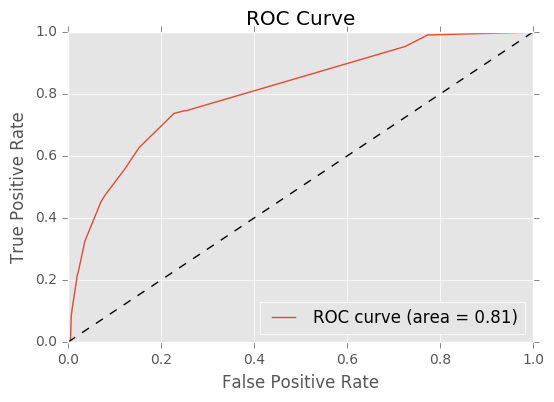

Random Forest
ROC AUC: 0.90


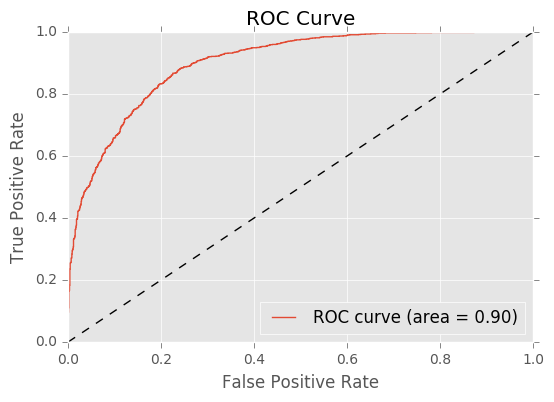

Gradient Boosting Classifier
ROC AUC: 0.89


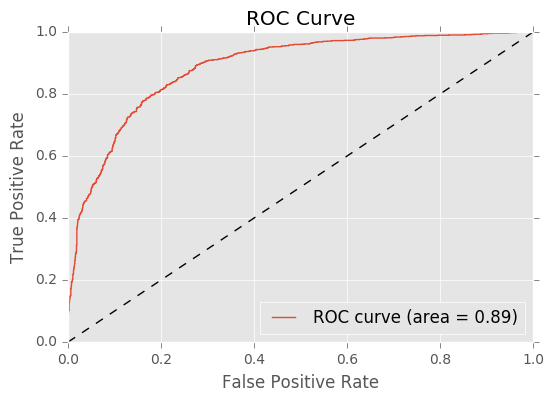

In [83]:
cms = {}
n_neg = float(y_test.value_counts()[0])
n_pos = float(y_test.value_counts()[1])
for name, clf in zip(names, classifiers):
    print(name)
    clf.fit(X_train, y_train)
    #cm = confusion_matrix(y_test, clf.predict(X_test))
    #cms[name] = cm
    #print("True positives: {}".format(cm[1,1] / n_pos))
    #print("False negatives: {}".format(cm[1,0] / n_pos))
    #print("True negatives: {}".format(cm[0,0] / n_neg))
    #print("True positives: {}".format(cm[0,1] / n_neg))
    #print("")
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    
    roc_auc = auc(fpr, tpr)
    print("ROC AUC: %0.2f" % roc_auc)
    
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [90]:
depth = [10, 30, 50,70]
for dep in depth:
    model = GradientBoostingClassifier(n_estimators = 500, max_depth = dep, 
                               min_samples_split = 2, min_samples_leaf = 2,
                               random_state = 1)
    model.fit(X_train, y_train)
    #train_score = model.train_score_
    test_score = model.score(X_test, y_test)
    print("Depth is :", dep)
    print("Train score : ", train_score)
    print("Test Score : ", test_score)

KeyboardInterrupt: 

In [18]:
len(X_train.columns)

1762

In [19]:
for col in X_train.columns:
    print(col)

Contract.Value.Band...see.note.A
S_100D
S_101A
S_103C
S_105A
S_107C
S_10B
S_111C
S_112D
S_113A
S_118B
S_11C
S_120D
S_126B
S_128D
S_12D
S_130B
S_132D
S_133A
S_134B
S_135C
S_136D
S_137A
S_138B
S_139C
S_13A
S_140D
S_141A
S_142B
S_143C
S_144D
S_145A
S_146B
S_147C
S_148D
S_149A
S_14B
S_150B
S_151C
S_152D
S_153A
S_154B
S_155C
S_156D
S_157A
S_158B
S_159C
S_15C
S_160D
S_161A
S_162B
S_163C
S_164D
S_165A
S_166B
S_167C
S_168D
S_169A
S_16D
S_170B
S_171C
S_172D
S_173A
S_174B
S_175C
S_176D
S_177A
S_178B
S_179C
S_180D
S_182B
S_183C
S_184D
S_185A
S_186B
S_187C
S_188D
S_189A
S_18B
S_190B
S_191C
S_192D
S_193A
S_194B
S_195C
S_196D
S_197A
S_198B
S_199C
S_1A
S_200D
S_201A
S_202B
S_203C
S_204D
S_205A
S_206B
S_207C
S_208D
S_20D
S_210B
S_211C
S_212D
S_213A
S_214B
S_215C
S_216D
S_217A
S_218B
S_219C
S_21A
S_220D
S_221A
S_222B
S_223C
S_224D
S_225A
S_226B
S_227C
S_228D
S_229A
S_230B
S_232D
S_233A
S_234B
S_235C
S_237A
S_238B
S_239C
S_23C
S_240D
S_241A
S_242B
S_243C
S_244D
S_245A
S_246B
S_247C
S_24D
S_250B
S_251C
S

## Work with start_date removed

In [20]:
train_indices = pd.read_csv("./data/training2_ids.csv")
train_indices.count()

ids    1557
dtype: int64

In [21]:
test_indices = pd.read_csv("./data/testing_ids.csv")
test_indices.count()

ids    518
dtype: int64

In [22]:
train_indices#, test_indices

,ids
0,6634
1,6635
2,6636
3,6637
4,6638
5,6639
6,6640
7,6642
8,6643
9,6644


In [23]:
train_indices = np.r_[train_indices] - 1
test_indices = np.r_[test_indices] - 1

In [24]:
valid_data = X.loc[list(train_indices.flatten())]
test_data = X.loc[list(test_indices.flatten())]

In [25]:
model = RandomForestClassifier(n_estimators = 150, max_depth = 15, 
                               min_samples_split = 2, min_samples_leaf = 2,
                               oob_score = True, random_state = 1)

In [26]:
for i 

    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    
    roc_auc = auc(fpr, tpr)
    print("ROC AUC: %0.2f" % roc_auc)

SyntaxError: invalid syntax (<ipython-input-26-e1997885ff9b>, line 1)